In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
trades_df= pd.read_csv(r'/content/historical_data.csv')
sentiment_df= pd.read_csv(r'/content/fear_greed_index.csv')

In [3]:
trades_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
trades_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
sentiment_df.shape

(2644, 4)

In [7]:
trades_df.shape

(211224, 16)

In [8]:
sentiment_df.size

10576

In [9]:
trades_df.size

3379584

In [10]:
sentiment_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [11]:
trades_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [12]:
sentiment_df.count

<bound method DataFrame.count of        timestamp  value classification        date
0     1517463000     30           Fear  2018-02-01
1     1517549400     15   Extreme Fear  2018-02-02
2     1517635800     40           Fear  2018-02-03
3     1517722200     24   Extreme Fear  2018-02-04
4     1517808600     11   Extreme Fear  2018-02-05
...          ...    ...            ...         ...
2639  1745818200     54        Neutral  2025-04-28
2640  1745904600     60          Greed  2025-04-29
2641  1745991000     56          Greed  2025-04-30
2642  1746077400     53        Neutral  2025-05-01
2643  1746163800     67          Greed  2025-05-02

[2644 rows x 4 columns]>

In [14]:
trades_df.count

<bound method DataFrame.count of                                            Account      Coin  Execution Price  \
0       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9769   
1       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9800   
2       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9855   
3       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9874   
4       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9894   
...                                            ...       ...              ...   
211219  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211220  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211221  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211222  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211223  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   

        Size Tokens  Size USD  Side     Timestamp IST  Start Position  \
0            986.87   7872.16   BUY  02-12-2024 22:50        0.000000   
1             16.00    127.68   BUY  02-12-2024 22:50      986.524596   
2            144.09   1150.63   BUY  02-12-2024 22:50     1002.518996   
3            142.98   1142.04   BUY  02-12-2024 22:50     1146.558564   
4              8.73     69.75   BUY  02-12-2024 22:50     1289.488521   
...             ...       ...   ...               ...             ...   
211219       382.20    420.80  SELL  25-04-2025 15:35     7546.600000   
211220      2124.10   2338.63  SELL  25-04-2025 15:35     7164.400000   
211221       423.40    466.16  SELL  25-04-2025 15:35     5040.300000   
211222      3599.80   3963.38  SELL  25-04-2025 15:35     4616.900000   
211223      1017.10   1119.83  SELL  25-04-2025 15:35     1017.100000   

         Direction  Closed PnL  \
0              Buy      0.0000   
1              Buy      0.0000   
2              Buy      0.0000   
3              Buy      0.0000   
4              Buy      0.0000   
...            ...         ...   
211219  Close Long    -20.2566   
211220  Close Long   -112.5773   
211221  Close Long    -22.4402   
211222  Close Long   -190.7894   
211223  Close Long    -53.9063   

                                         Transaction Hash     Order ID  \
0       0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
1       0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
2       0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
3       0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
4       0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
...                                                   ...          ...   
211219  0xcd339c08dc7b615a993c0422374d8e02027400092bc2...  88803313862   
211220  0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...  88803313862   
211221  0x0780085b0c0a943eea800422374d920204c100edf579...  88803313862   
211222  0x349c29934913b25c89e20422374d920204cd008b8a0e...  88803313862   
211223  0xac77fab973c455d77a670422374d9602039800f1f78c...  88803313862   

        Crossed       Fee      Trade ID     Timestamp  
0          True  0.345404  8.950000e+14  1.730000e+12  
1          True  0.005600  4.430000e+14  1.730000e+12  
2          True  0.050431  6.600000e+14  1.730000e+12  
3          True  0.050043  1.080000e+15  1.730000e+12  
4          True  0.003055  1.050000e+15  1.730000e+12  
...         ...       ...           ...           ...  
211219    False  0.042080  1.990000e+14  1.750000e+12  
211220    False  0.233863  9.260000e+14  1.750000e+12  
211221    False  0.046616  6.930000e+14  1.750000e+12  
211222    False  0.396337  4.180000e+14  1.750000e+12  
211223    False  0.111982  3.270000e+14  1.750000e+12  

[211224 rows x 16 columns]>

In [15]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [16]:
trades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [17]:
#converting date columns
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
trades_df['Timestamp'] = pd.to_datetime(trades_df['Timestamp'])

trades_df['date_only'] = trades_df['Timestamp'].dt.date
sentiment_df['Date_only'] = sentiment_df['date'].dt.date

trades_df.dropna(inplace=True)
sentiment_df.dropna(inplace=True)


In [18]:
trades_df['date_only'] = pd.to_datetime(
    trades_df['Timestamp IST'], format="%d-%m-%Y %H:%M", errors='coerce'
).dt.date

sentiment_df['Date_only'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.date

# Merge on date
merged_df = pd.merge(
    trades_df,
    sentiment_df[['Date_only', 'classification']],
    left_on='date_only',
    right_on='Date_only',
    how='left'
)

# Clean up column name
merged_df.rename(columns={'Classification': 'classification'}, inplace=True)

# Check merge result
merged_df['classification'].value_counts(dropna=False)



,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400
NaN,6


In [19]:
merged_df.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)


,Closed PnL
classification,
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Extreme Fear,34.537862
Neutral,34.307718


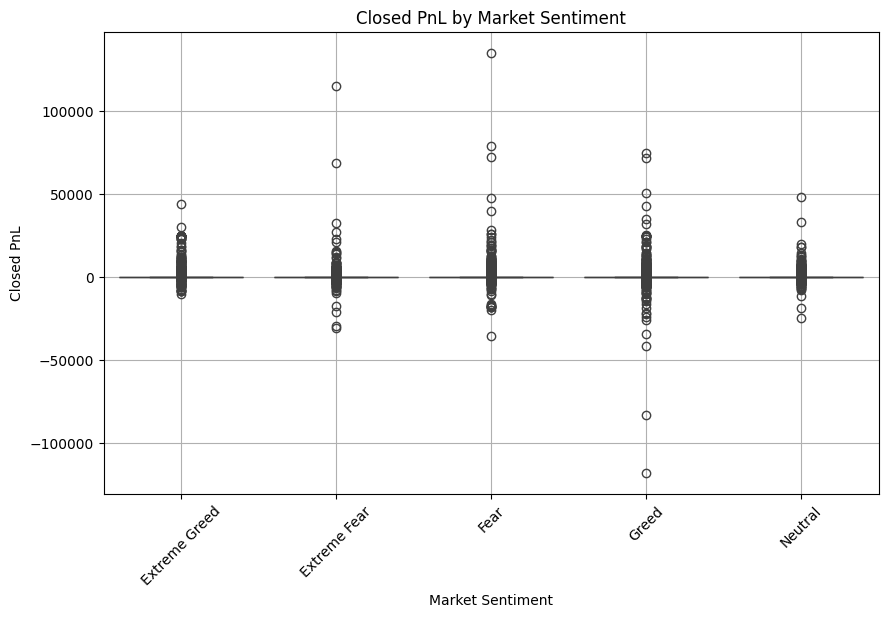

In [20]:
#boxplot of pnl by sentiment
import seaborn as sns
import matplotlib.pyplot as plt
import os

plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45)
plt.grid()

#create outputs directory if it does not exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')

#save the chart
plt.savefig('outputs/closed_pnl_by_sentiment.png')
plt.show()

In [21]:
#trade volume by sentiment (USD)
merged_df.groupby('classification')['Size USD'].sum().sort_values(ascending=False)


,Size USD
classification,
Fear,4.833248e+08
Greed,2.885825e+08
Neutral,1.802421e+08
Extreme Greed,1.244652e+08
Extreme Fear,1.144843e+08


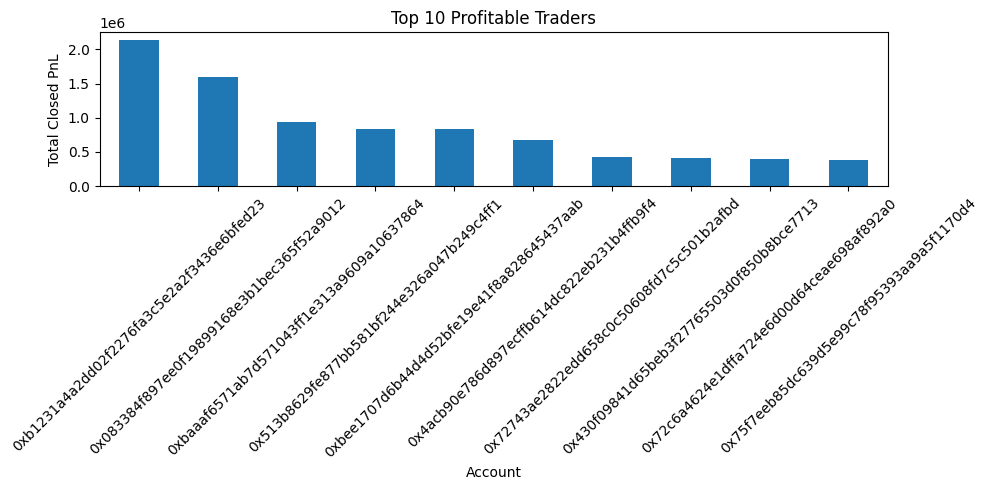

In [22]:
#top performing traders
top_traders = merged_df.groupby('Account')['Closed PnL'].sum().sort_values(ascending=False).head(10)
top_traders.plot(kind='bar', figsize=(10,5), title='Top 10 Profitable Traders')
plt.ylabel('Total Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('outputs/top_10_traders.png')
plt.show()


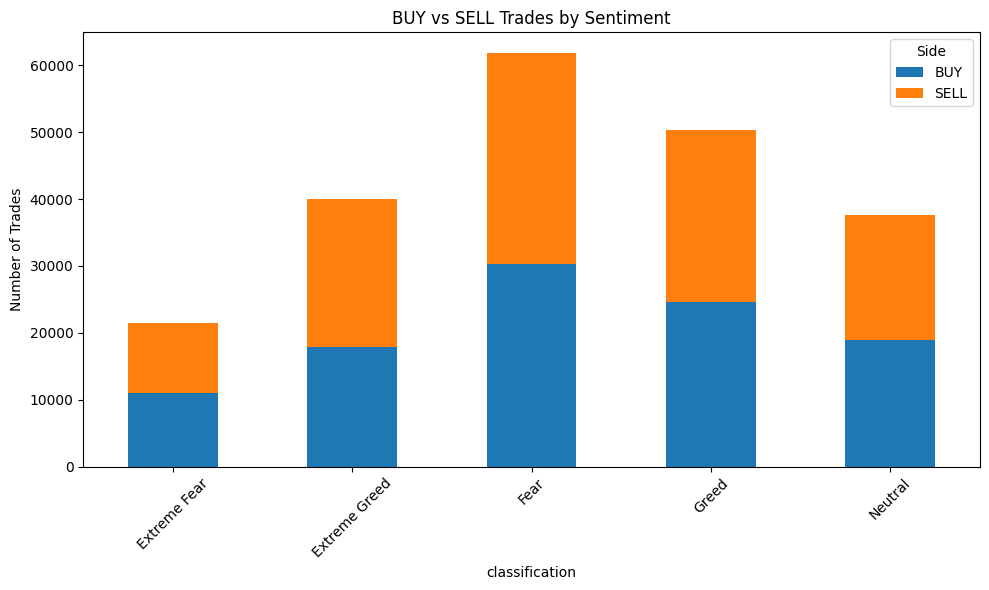

In [23]:
buy_sell = merged_df.groupby(['classification', 'Side']).size().unstack().fillna(0)

buy_sell.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("BUY vs SELL Trades by Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('outputs/buy_sell_by_sentiment.png')
plt.show()


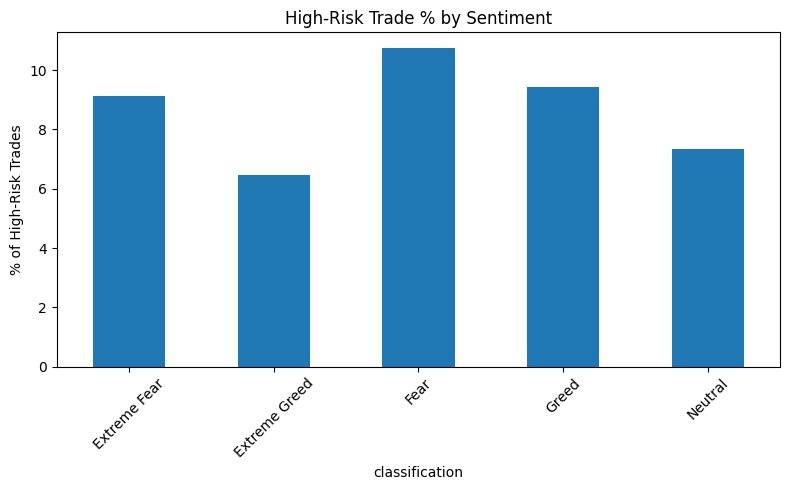

In [24]:
#Let's assume Size USD >10,000 is high-risk
merged_df['High Risk'] = merged_df['Size USD'] > 10000

risk_summary = merged_df.groupby('classification')['High Risk'].mean() * 100
risk_summary.plot(kind='bar', figsize=(8,5), title='High-Risk Trade % by Sentiment')
plt.ylabel('% of High-Risk Trades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('outputs/high_risk_trades.png')
plt.show()


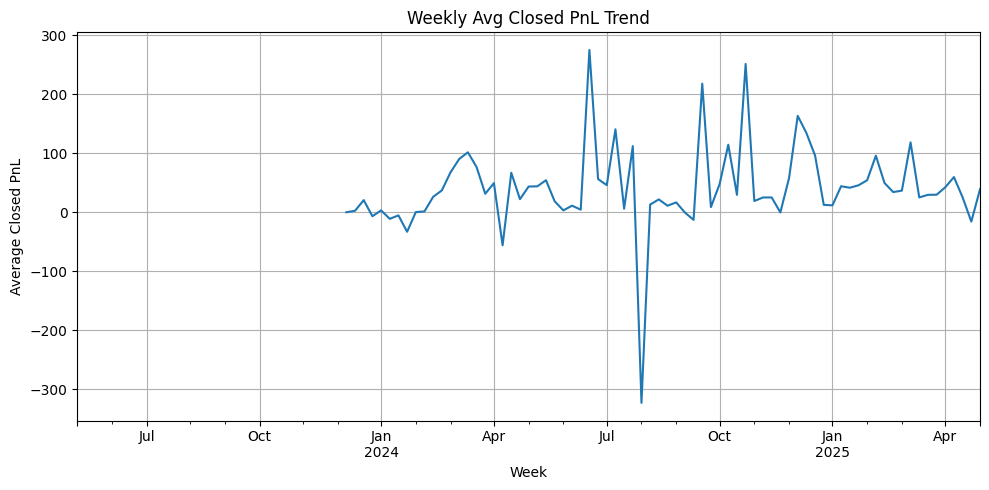

In [25]:
#trend over time (PnL trend)
merged_df['date_only'] = pd.to_datetime(merged_df['date_only'])
pnl_trend = merged_df.groupby(pd.Grouper(key='date_only', freq='W'))['Closed PnL'].mean()

pnl_trend.plot(figsize=(10,5), title='Weekly Avg Closed PnL Trend')
plt.ylabel('Average Closed PnL')
plt.xlabel('Week')
plt.grid()
plt.tight_layout()
plt.savefig('outputs/pnl_weekly_trend.png')
plt.show()

In [26]:
import os

if not os.path.exists('csv_files'):
    os.makedirs('csv_files')

merged_df.to_csv('csv_files/cleaned_trader_sentiment_data.csv', index=False)

In [27]:
merged_df.to_csv('cleaned_data.csv', index=False)